# Modelo de Previsão de Demanda

#### # Importando Módulos

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Parte I: Importando e Ententendo Base de Dados

In [48]:
dados = pd.read_excel('dados/Base Vendas.xlsx')

In [49]:
dados.head()

,SKU,Produto,Qtd Vendida,Data,Loja,Preço Unitário,Nome,Sobrenome,Gênero,Unnamed: 9
0,HL1918,iPhone,4,2020-01-01,Salvador - BA,5300,Wilson,Arruda,M,NaN
1,HL7348,SmartWatch,5,2020-01-01,São Paulo - SP,1400,Anna,Silva,F,NaN
2,HL1148,Câmera,2,2020-01-01,Curitiba - PR,2100,Natalia,Oliveira,F,NaN
3,HL8851,Notebook,2,2020-01-01,São Paulo - SP,3500,Caio,Vianna,M,NaN
4,HL9962,Android,1,2020-01-01,Salvador - BA,3400,Maria,Ribeiro,F,NaN


In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SKU             9999 non-null   object        
 1   Produto         9999 non-null   object        
 2   Qtd Vendida     9999 non-null   int64         
 3   Data            9999 non-null   datetime64[ns]
 4   Loja            9999 non-null   object        
 5   Preço Unitário  9999 non-null   int64         
 6   Nome            9999 non-null   object        
 7   Sobrenome       9999 non-null   object        
 8   Gênero          9999 non-null   object        
 9   Unnamed: 9      1 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 781.3+ KB


In [51]:
dados.shape

(9999, 10)

## Parte II: Tratando Base de Dados

In [53]:
dados.drop(columns = ['Produto', 'SKU', 'Gênero', 'Loja', 'Preço Unitário', 'Nome', 'Sobrenome','Unnamed: 9'], axis = 1, inplace = True)

In [54]:
dados.head()

,Qtd Vendida,Data
0,4,2020-01-01
1,5,2020-01-01
2,2,2020-01-01
3,2,2020-01-01
4,1,2020-01-01


In [55]:
vendas = dados.groupby(['Data'])[['Qtd Vendida']].sum().reset_index()

In [56]:
vendas.head()

,Data,Qtd Vendida
0,2020-01-01,99
1,2020-01-02,102
2,2020-01-03,136
3,2020-01-04,73
4,2020-01-05,78


<AxesSubplot:xlabel='Data'>

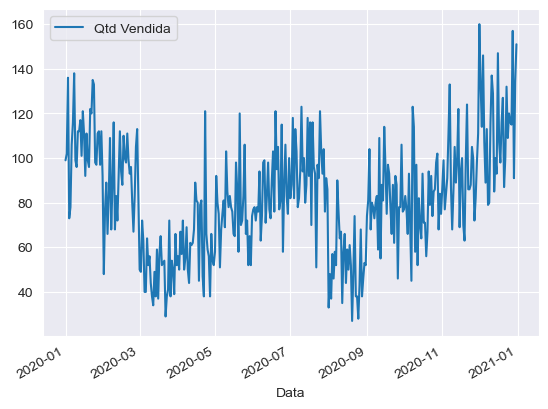

In [57]:
vendas.plot(y = 'Qtd Vendida', x = 'Data')

## Parte III: Treinando Modelo de Previsão de Demanda com Regressão Linear

In [58]:
vendas['Mês'] = vendas['Data'].dt.month

In [59]:
vendas.head()

,Data,Qtd Vendida,Mês
0,2020-01-01,99,1
1,2020-01-02,102,1
2,2020-01-03,136,1
3,2020-01-04,73,1
4,2020-01-05,78,1


In [60]:
vendas['trend'] = range(vendas.shape[0])

In [61]:
vendas.head()

,Data,Qtd Vendida,Mês,trend
0,2020-01-01,99,1,0
1,2020-01-02,102,1,1
2,2020-01-03,136,1,2
3,2020-01-04,73,1,3
4,2020-01-05,78,1,4


In [62]:
vendas['Mês'] = vendas['Mês'].astype('category')

In [63]:
x = vendas.drop(columns = ['Data', 'Qtd Vendida'], axis = 1)

In [64]:
x

,Mês,trend
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
360,12,360
361,12,361
362,12,362
363,12,363


In [65]:
nomes = pd.get_dummies(x).columns

In [66]:
x = pd.get_dummies(x).values
x

array([[0, True, False, ..., False, False, False],
       [1, True, False, ..., False, False, False],
       [2, True, False, ..., False, False, False],
       ...,
       [362, False, False, ..., False, False, True],
       [363, False, False, ..., False, False, True],
       [364, False, False, ..., False, False, True]], dtype=object)

In [67]:
y = vendas['Qtd Vendida'].values
y

array([ 99, 102, 136,  73,  78, 106, 116, 138,  99,  96, 112, 112, 117,
       101, 121, 111,  92, 111,  99,  96, 122, 120, 135, 133,  98,  97,
       111, 112,  97, 112,  92,  48,  77,  89,  66,  83, 109,  68,  88,
       116,  68,  83,  72,  92, 112,  94,  88, 110, 100,  98, 111,  99,
        93,  96,  80,  67,  83, 105, 113,  50,  49,  72,  63,  40,  40,
        64,  52,  56,  44,  38,  34,  49,  38,  59,  37,  57,  65,  52,
        53,  54,  29,  38,  41,  72,  38,  54,  50,  39,  66,  52,  56,
        50,  67,  57,  72,  50,  55,  69,  50,  44,  62,  61,  62,  68,
        89,  81,  80,  45,  79,  81,  47,  38, 121,  66,  59,  56,  38,
        66,  54,  52,  58,  92,  80,  75,  51,  68,  75,  81,  69, 103,
        85,  78,  83,  78,  76,  66,  65,  98,  86,  58, 120,  70,  72,
        83, 106,  66,  72,  52,  65,  52,  74,  77,  78,  72,  78,  76,
        94,  63,  74,  98,  99,  71,  83,  98,  77,  73,  90, 103,  76,
       121,  95, 105,  77,  81, 115,  58,  88, 106,  83,  75, 10

In [68]:
modelo = LinearRegression()

In [69]:
modelo.fit(x, y)

LinearRegression()

In [70]:
modelo.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [71]:
modelo.coef_

array([  0.09811194,  41.8266961 ,  20.63285484, -21.99416615,
       -12.32528985,  -1.78544581,   5.32321543,  11.00391969,
       -35.00529224,  -8.30308261, -13.28044287,  -3.021244  ,
        16.92827746])

In [72]:
dict_1 = list(zip(nomes, modelo.coef_))

In [73]:
previsao = modelo.predict(x)

In [74]:
previsao

array([106.39928871, 106.49740065, 106.59551258, 106.69362452,
       106.79173645, 106.88984839, 106.98796032, 107.08607226,
       107.1841842 , 107.28229613, 107.38040807, 107.47852   ,
       107.57663194, 107.67474387, 107.77285581, 107.87096774,
       107.96907968, 108.06719161, 108.16530355, 108.26341548,
       108.36152742, 108.45963935, 108.55775129, 108.65586322,
       108.75397516, 108.85208709, 108.95019903, 109.04831097,
       109.1464229 , 109.24453484, 109.34264677,  88.24691745,
        88.34502938,  88.44314132,  88.54125325,  88.63936519,
        88.73747712,  88.83558906,  88.93370099,  89.03181293,
        89.12992486,  89.2280368 ,  89.32614873,  89.42426067,
        89.5223726 ,  89.62048454,  89.71859647,  89.81670841,
        89.91482034,  90.01293228,  90.11104422,  90.20915615,
        90.30726809,  90.40538002,  90.50349196,  90.60160389,
        90.69971583,  90.79782776,  90.8959397 ,  48.36703065,
        48.46514258,  48.56325452,  48.66136645,  48.75

In [75]:
vendas['previsão'] = previsao

In [76]:
vendas

,Data,Qtd Vendida,Mês,trend,previsão
0,2020-01-01,99,1,0,106.399289
1,2020-01-02,102,1,1,106.497401
2,2020-01-03,136,1,2,106.595513
3,2020-01-04,73,1,3,106.693625
4,2020-01-05,78,1,4,106.791736
...,...,...,...,...,...
360,2020-12-27,115,12,360,116.821167
361,2020-12-28,157,12,361,116.919279
362,2020-12-29,91,12,362,117.017391
363,2020-12-30,134,12,363,117.115503


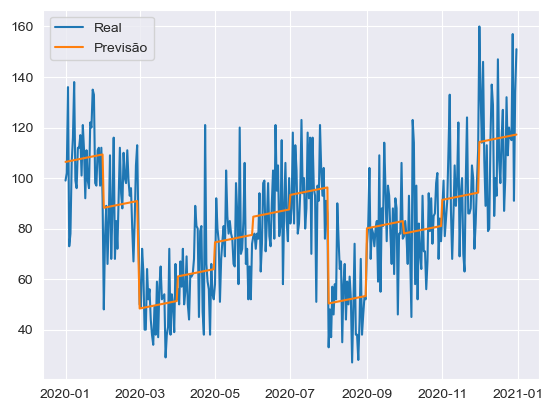

In [77]:
plt.plot(vendas['Data'], vendas['Qtd Vendida'], label = "Real")
plt.plot(vendas['Data'], vendas['previsão'], label = "Previsão")
plt.legend(loc = "upper left")
plt.show()

## Parte IV: Fazendo a Previsão de Demanda

In [78]:
data_max = vendas.Data.max()
data_max

Timestamp('2020-12-31 00:00:00')

In [79]:
datas = pd.date_range('2021-01-01', '2021-12-31', freq = 'W')

In [80]:
datas = pd.DataFrame({'Data': datas}, index = range(len(datas)))

In [81]:
datas

,Data
0,2021-01-03
1,2021-01-10
2,2021-01-17
3,2021-01-24
4,2021-01-31
5,2021-02-07
6,2021-02-14
7,2021-02-21
8,2021-02-28
9,2021-03-07


In [82]:
vendas =  pd.concat([vendas, datas], axis = 0)

In [83]:
vendas = dados.groupby(['Data'])[['Qtd Vendida']].sum().reset_index()

In [84]:
vendas =  pd.concat([vendas, datas], axis = 0)
vendas

,Data,Qtd Vendida
0,2020-01-01,99.0
1,2020-01-02,102.0
2,2020-01-03,136.0
3,2020-01-04,73.0
4,2020-01-05,78.0
...,...,...
47,2021-11-28,NaN
48,2021-12-05,NaN
49,2021-12-12,NaN
50,2021-12-19,NaN


In [85]:
vendas['trend'] = range(vendas.shape[0])

In [86]:
vendas['Mês'] = vendas['Data'].dt.month

In [87]:
vendas['Mês'] = vendas['Mês'].astype('category')

In [88]:
x = vendas.drop(columns = ['Data', 'Qtd Vendida'], axis = 1)

In [89]:
nomes = pd.get_dummies(x).columns
x = pd.get_dummies(x).values
y = vendas['Qtd Vendida'].values

In [90]:
previsao = modelo.predict(x)

In [91]:
vendas['previsão'] = previsao

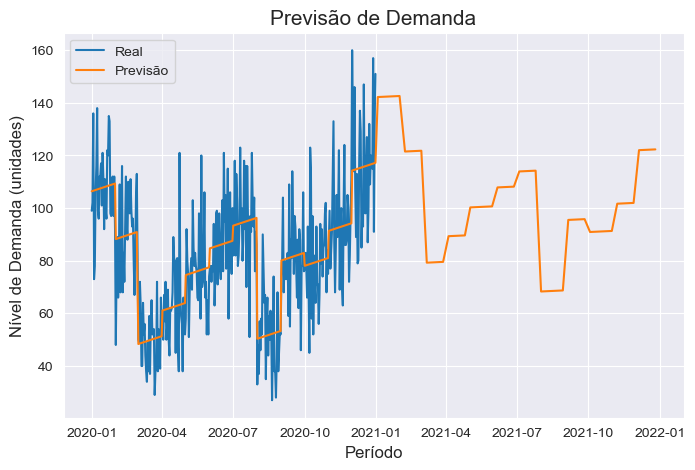

In [92]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 5))
plt.plot(vendas['Data'], vendas['Qtd Vendida'], label = "Real")
plt.plot(vendas['Data'], vendas['previsão'], label = "Previsão")
plt.legend(loc = "upper left")

plt.xlabel('Período', fontsize = 12)
plt.ylabel('Nível de Demanda (unidades)', fontsize = 12)
plt.title('Previsão de Demanda', fontsize = 15)

plt.show()